## __Mushrooms Classification Model using Logistic Regression__

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [54]:
# importing dataset
data = pd.read_csv('mushrooms.csv')
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

### Exploratory Data Analysis

In [55]:
# checking the shape of dataset
data.shape

(8124, 23)

In [56]:
# checking missing value in dataset
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

    The dataset has no missing value

In [57]:
# checking the distribution of target value
x = data['class']
ax = sns.countplot(x=x, data=data)

    The target value of the dataset is fairly balanced

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


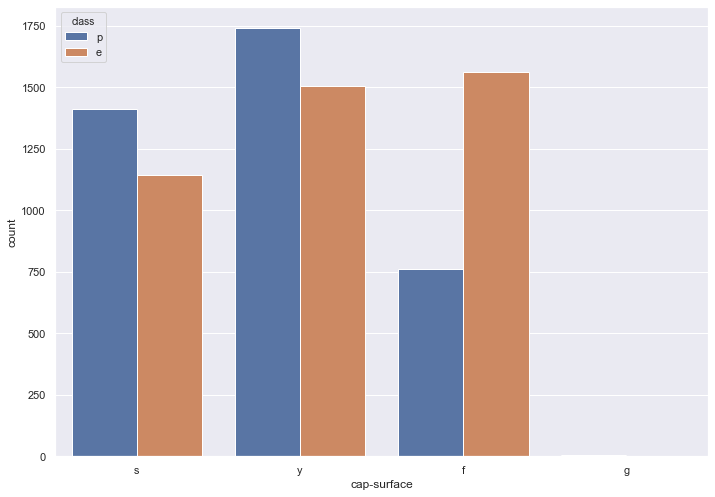

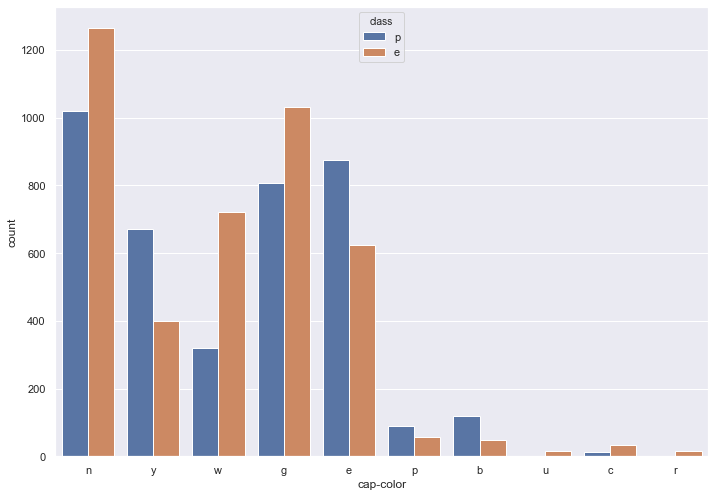

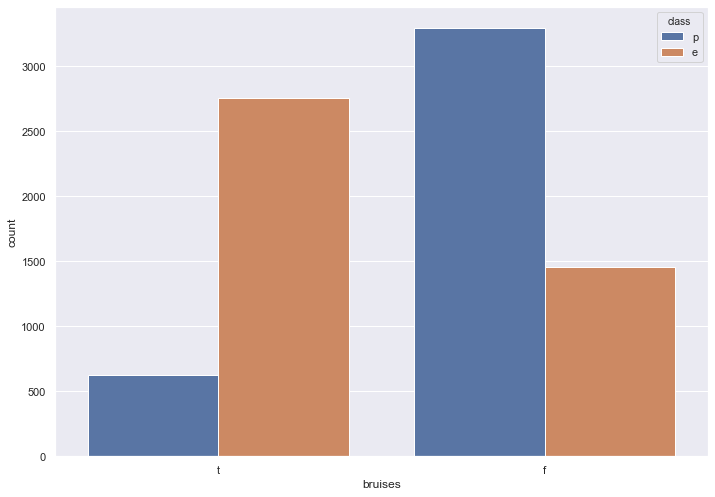

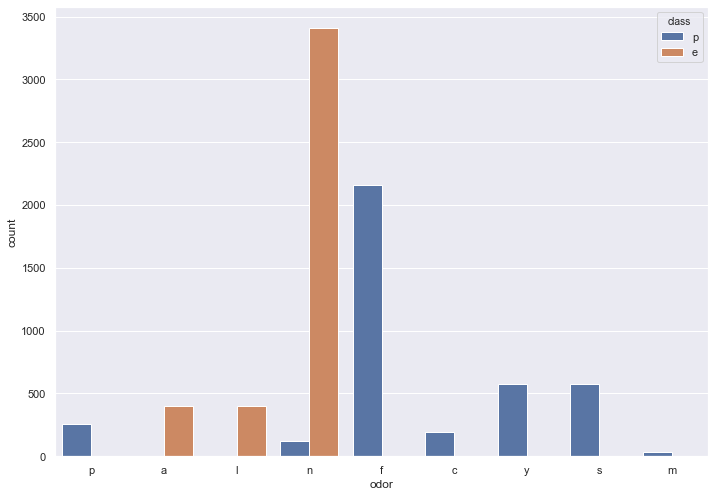

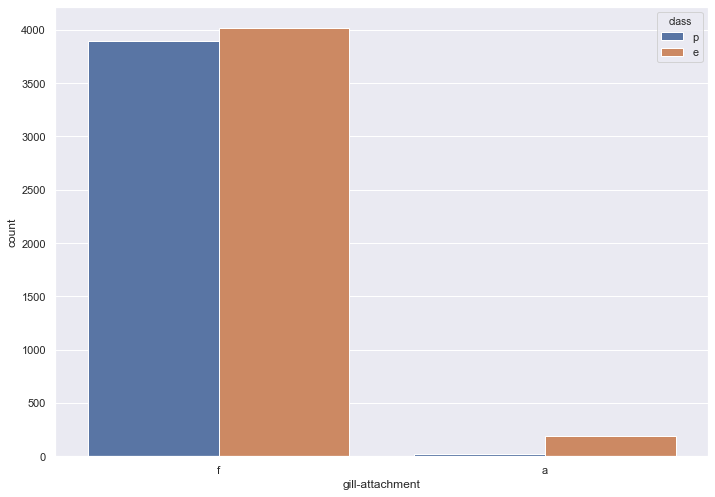

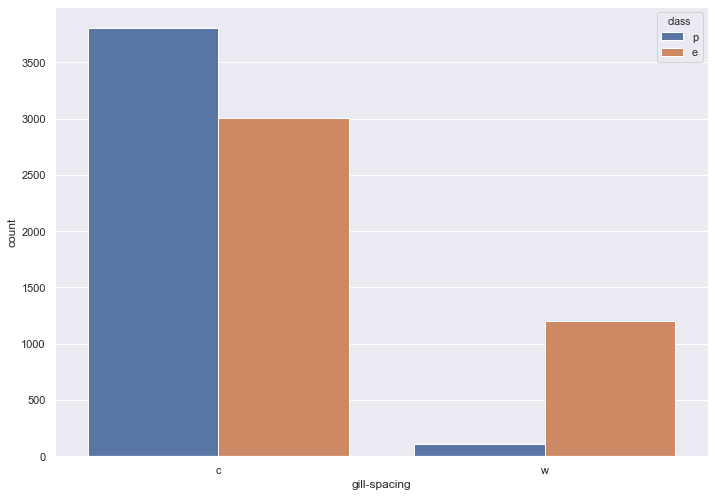

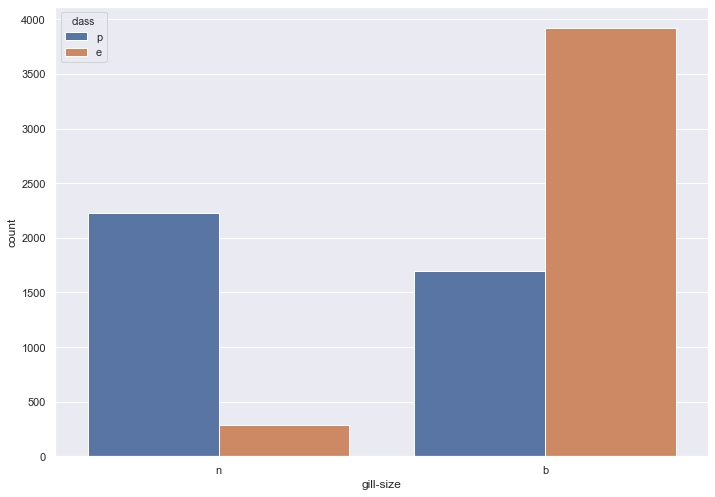

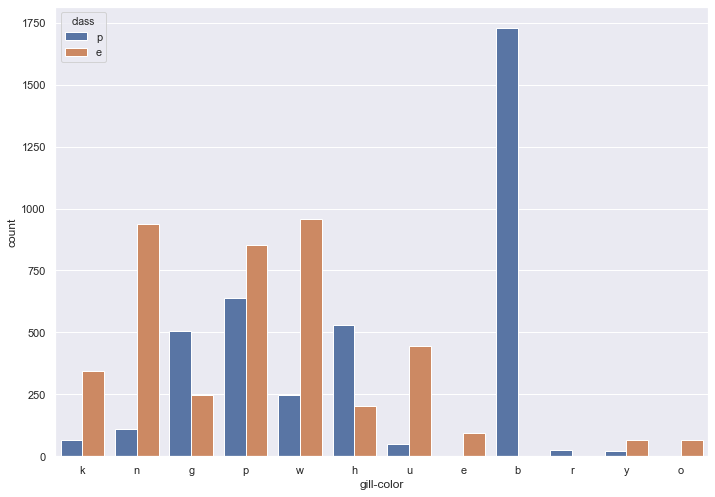

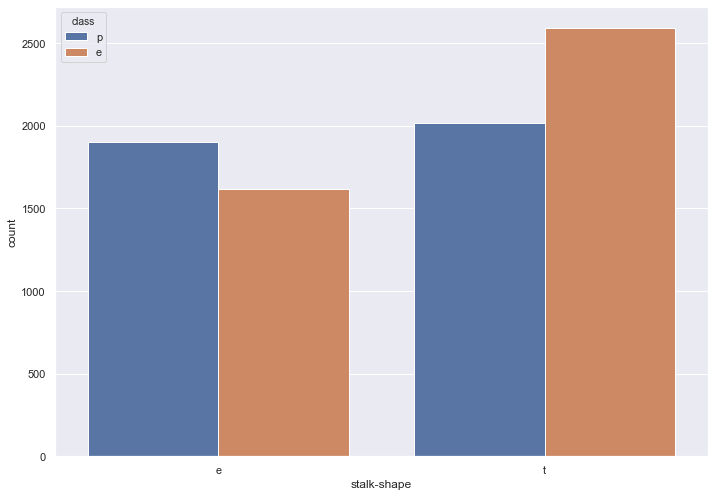

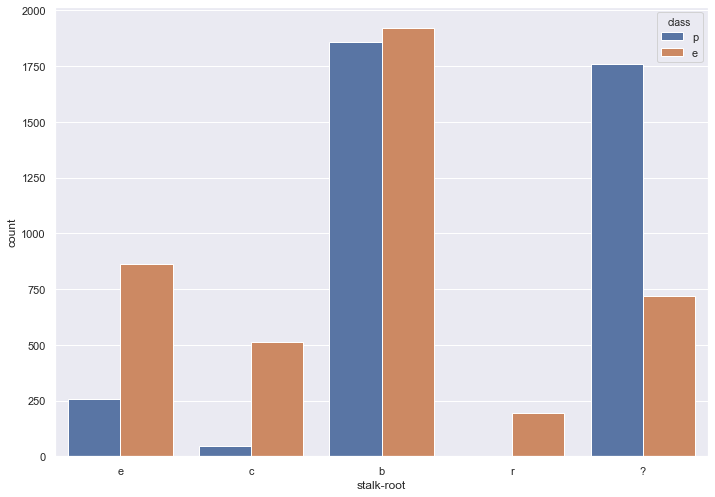

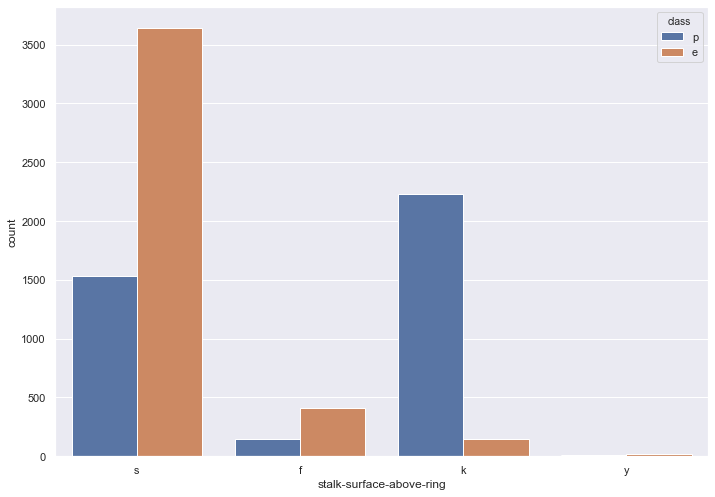

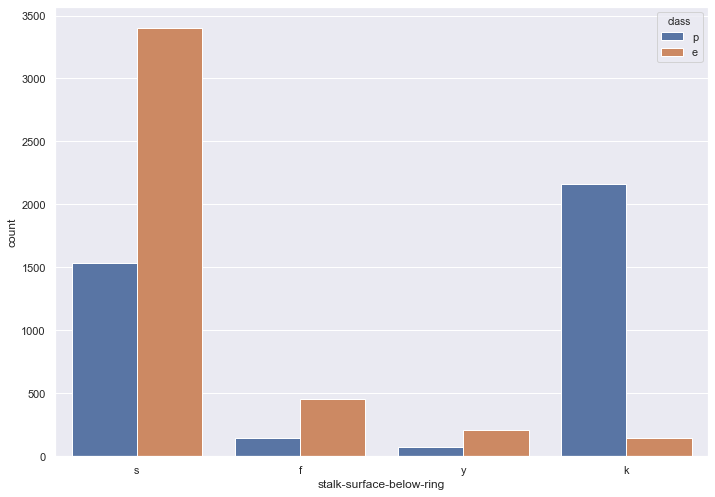

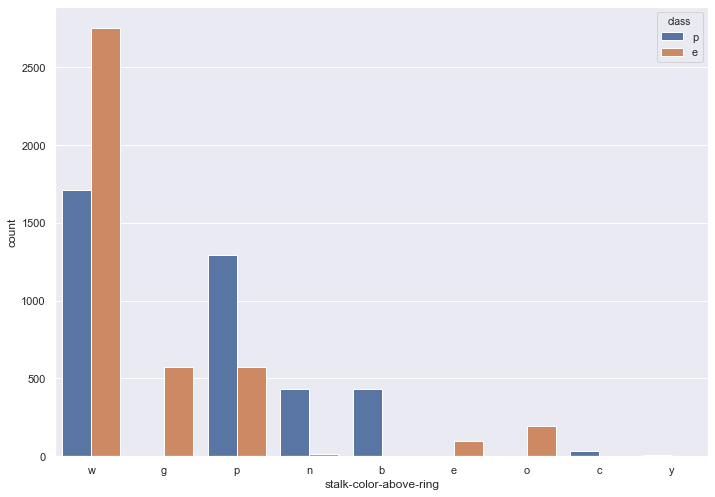

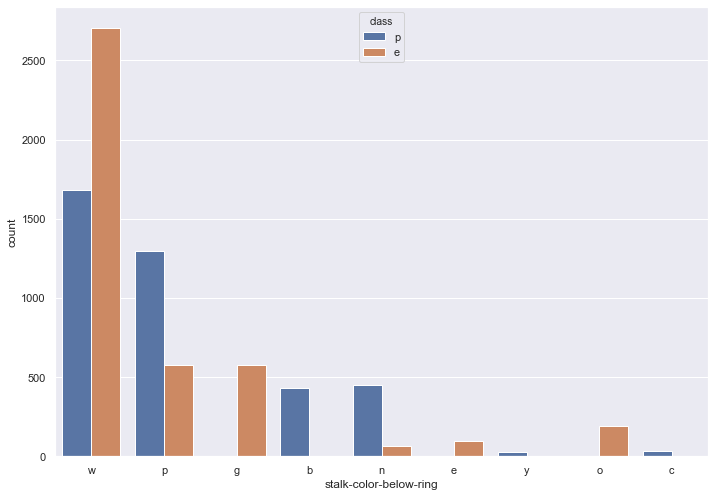

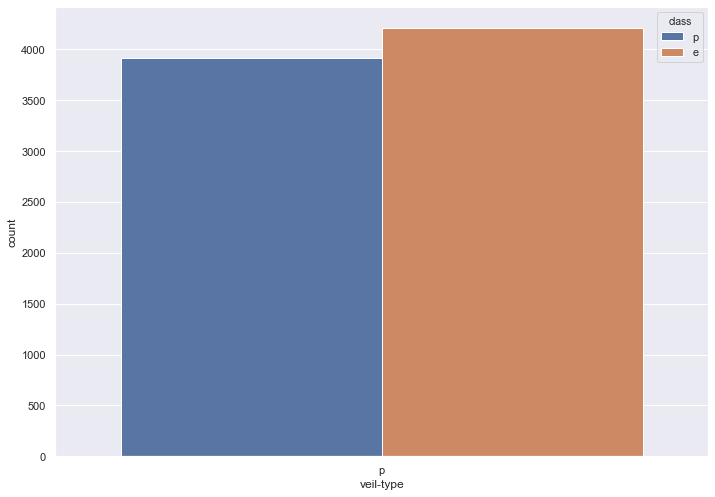

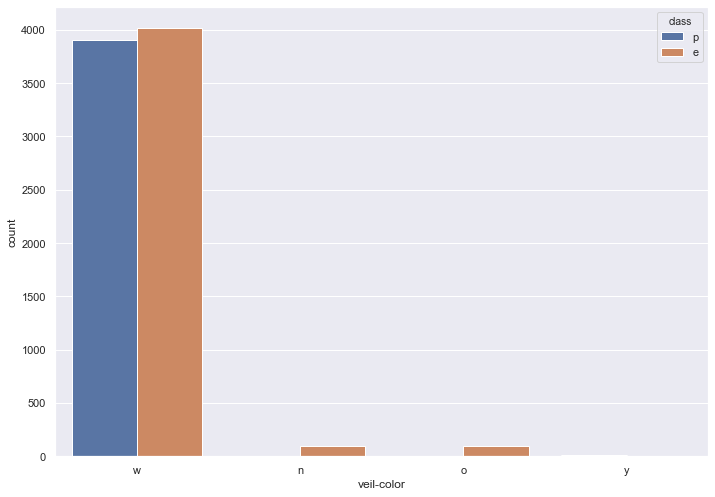

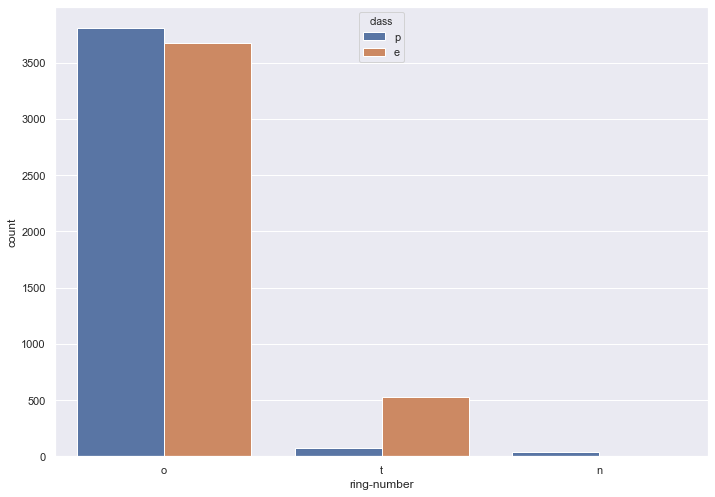

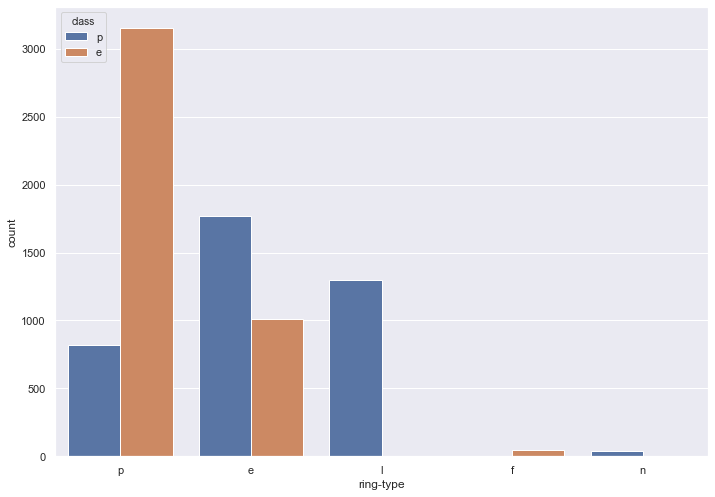

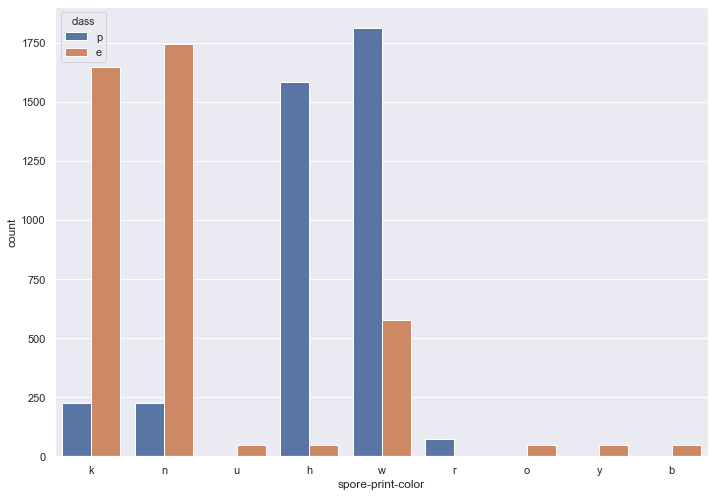

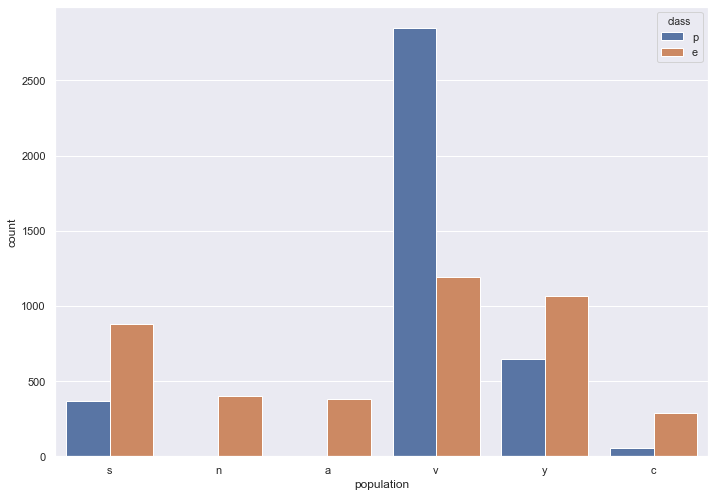

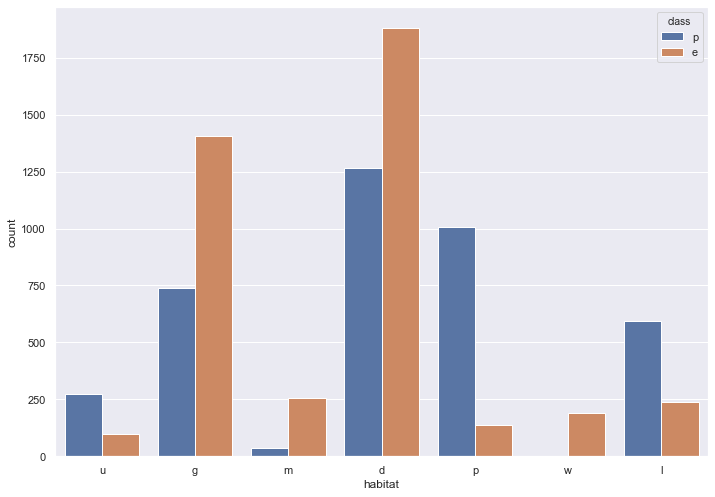

In [58]:
# checking how each feature affects target value
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure()
        sns.set(rc={'figure.figsize':(11.7, 8.27)})
        ax = sns.countplot(x=data[col], hue=hue, data=data)

hue = data['class']
data_for_plot = data.drop('class', axis=1)

plot_data(hue, data_for_plot)

### Modelling

In [61]:
# encoded categorical value into number
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [62]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1            0            0            0            0            0   
1      0            0            0            0            0            0   
2      0            1            0            0            0            0   
3      1            0            0            0            0            0   
4      0            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 118 columns]

In [63]:
# Splitting data
x = encoded_data
y = data['class'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.20, random_state=42)

In [65]:
# creating logreg object and fit train data set
logistic_reg = LogisticRegression()

logistic_reg.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# predict probability that a mushroom is poisonous
y_prob = logistic_reg.predict_proba(x_test)[:,1]

# set threshold to 0.5. 
# That way, if probability > 0.5, a mushroom will be classified as poisonous
# if probability < 0.5, a mushroom will be classified as edible
y_pred = np.where(y_prob > 0.5, 1, 0)

### Model Evaluation

In [68]:
# compute confusion matrix for model evaluation
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

    false positive and false negative rate = 0, meaning that all mushrooms were correctly classified as poisonous or edible

In [69]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

1.0

    auc_roc = 1 meaning that we has a perfect classifier

In [70]:
# visualizing ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc(roc_auc)